In [2]:
pip install fastbook

     |████████████████████████████████| 719 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 519 kB 44.6 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 58.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 48.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 50.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 55.8 MB 109.0 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 33.2 MB/s eta 0:00:01
     |████████████████████████████████| 491 kB 55.1 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 790 kB 51.4 MB/s eta 0:00:01
     |██████████████████████████████

In [3]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))

In [4]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


'http://www.hdnicewallpapers.com/Walls/Big/Other%20Birds/Beautiful_Kingfisher_Bird_Wallpaper.jpg'

In [5]:
from fastdownload import download_url

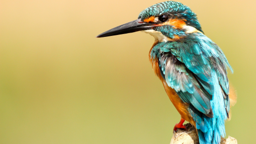

In [6]:
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest photos'


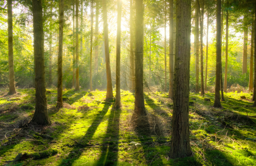

In [7]:
download_url(search_images('forest photos',max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [8]:
searches='bird','forest'
path = Path('bird or not')
from time import sleep
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls = search_images(f'{o} photo'))
    sleep(10)
    download_images(dest, urls = search_images(f'{o} sun photo'))
    sleep(10)   
    download_images(dest, urls = search_images(f'{o} shade photo'))
    sleep(10) 
    resize_images(path/o, max_size = 400, dest = path/o)

Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'
Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'


In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

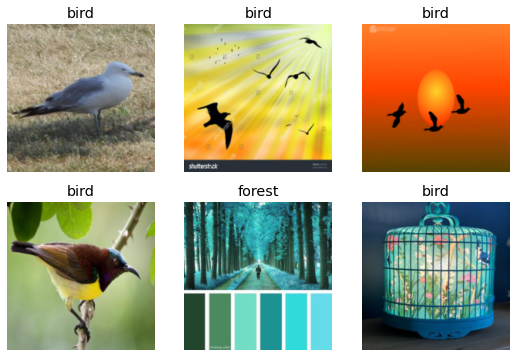

In [10]:
dls = DataBlock(blocks = (ImageBlock, CategoryBlock), get_items = get_image_files, 
                splitter = RandomSplitter(valid_pct=0.2, seed = 42), get_y = parent_label,
                item_tfms=[Resize(192, method='squish')]).dataloaders(path, bs=32)
dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/Users/eobodoechine/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/eobodoechine/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/eobodoechine/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████| 44.7M/44.7M [00:01<00:00, 37.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.960918,0.969711,0.242424,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.274735,0.106589,0.030303,00:07
1,0.144394,0.034571,0.000000,00:03
2,0.124440,0.031833,0.000000,00:03
